# Импорта

In [2]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pydub
import pandas as pd
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import IPython.display as ipd
from pydub import utils,AudioSegment 
import os

# Анализ

In [3]:
train = pd.read_csv('data/train_gt.csv', index_col=None)
train

,611b27e7-0019-4fc6-9622-21d9647c45f0.mp3,1
0,67465147-b88c-4acd-bb91-a78340a9bde7.mp3,0
1,257002c3-13ce-4408-853a-a5686a051d1c.mp3,0
2,16c70c64-e167-40e5-a4be-cf861e84c497.mp3,0
3,6ed94dcd-d1e5-4d98-b6ee-d86766d7bf50.mp3,1
4,d624ad1d-6f6a-4994-bb05-46cb7c146c46.mp3,1
...,...,...
8797,4aa877af-9732-48ce-9f62-039ef9efcd71.mp3,0
8798,f0f0fe3d-a310-4493-90a5-29ec74f36190.mp3,1
8799,00ba7f5c-b440-4793-8771-e475e1eca510.mp3,0
8800,c0033769-6686-4bc8-9197-a13563dbd8a5.mp3,1


In [4]:
audio_data = 'data/train/611b27e7-0019-4fc6-9622-21d9647c45f0.mp3'

In [5]:
x , sr = lb.load(audio_data, sr=44100)
print(type(x), type(sr)) 
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(135828,) 44100


In [6]:
ipd.Audio(audio_data)


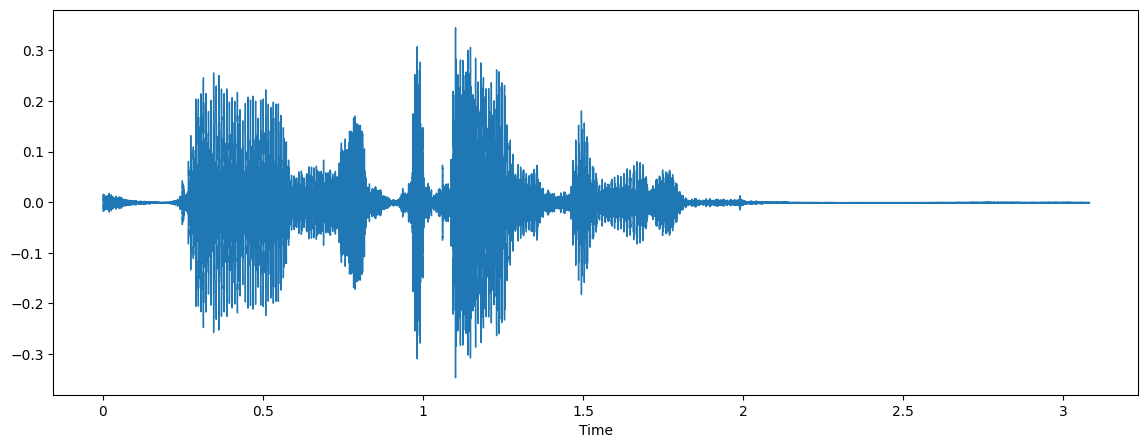

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

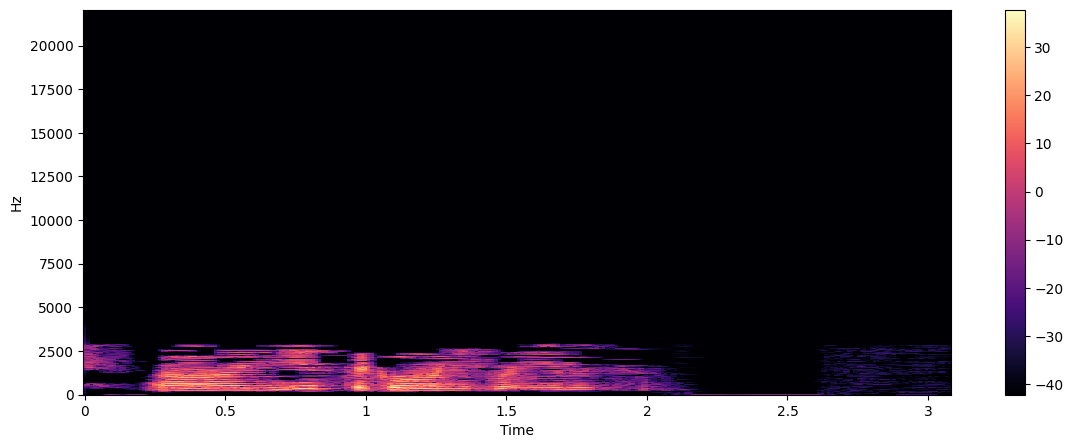

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Признаки

#### Загрузка

In [14]:
x, r = lb.load(audio_data)

#### Спектральный центроид

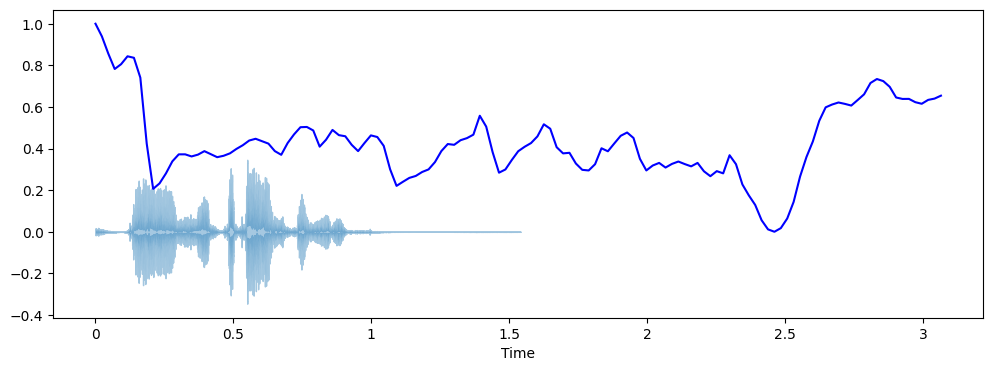

In [10]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

#### Спектральный спад

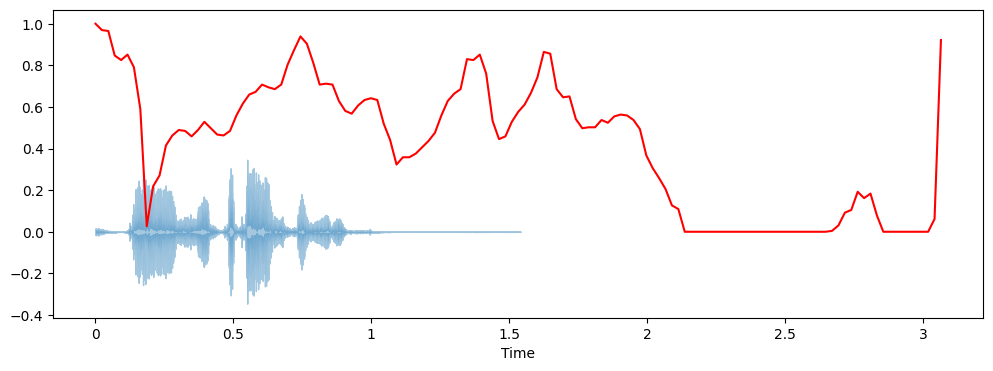

In [11]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

#### Спектральная ширина

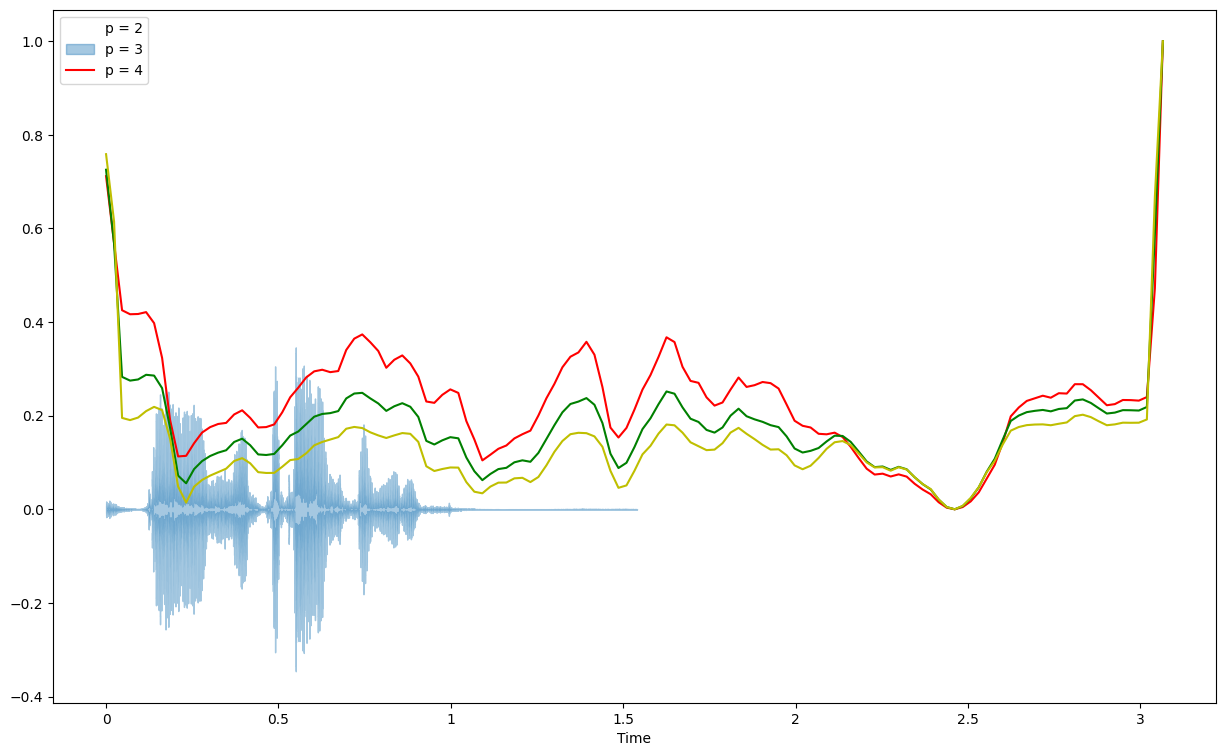

In [12]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#### Скорость пресечения нуля

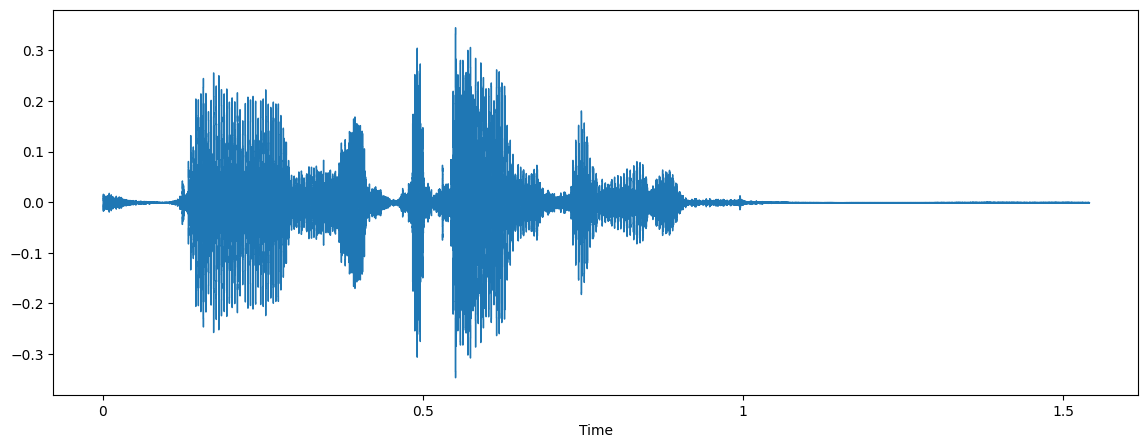

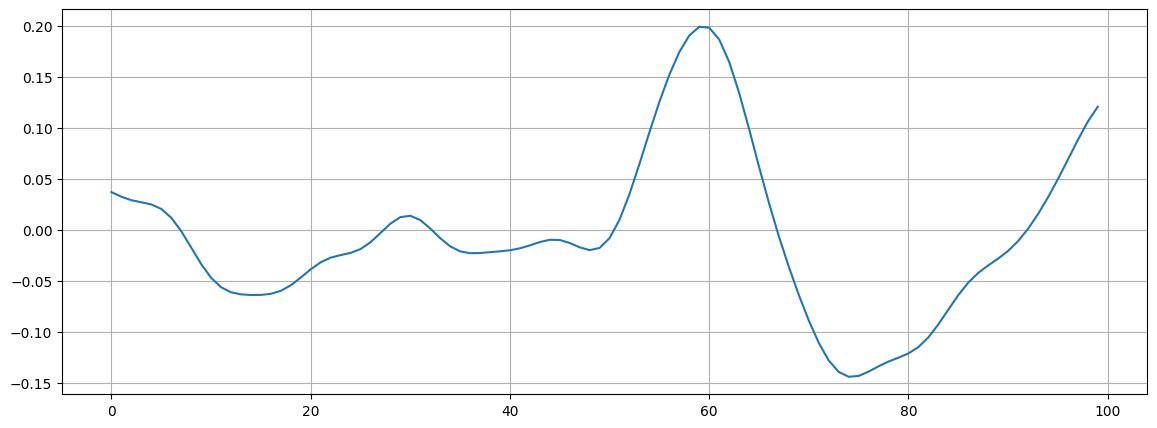

In [15]:
# Построение графика сигнала:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Увеличение масштаба:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

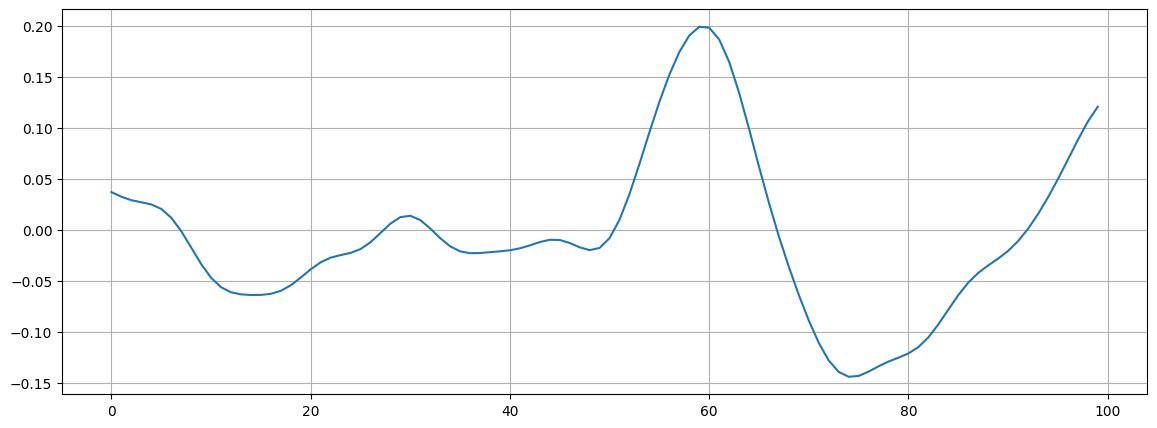

In [16]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [17]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

6


#### Мел-частотные кепстральные коэффициенты

(20, 133)


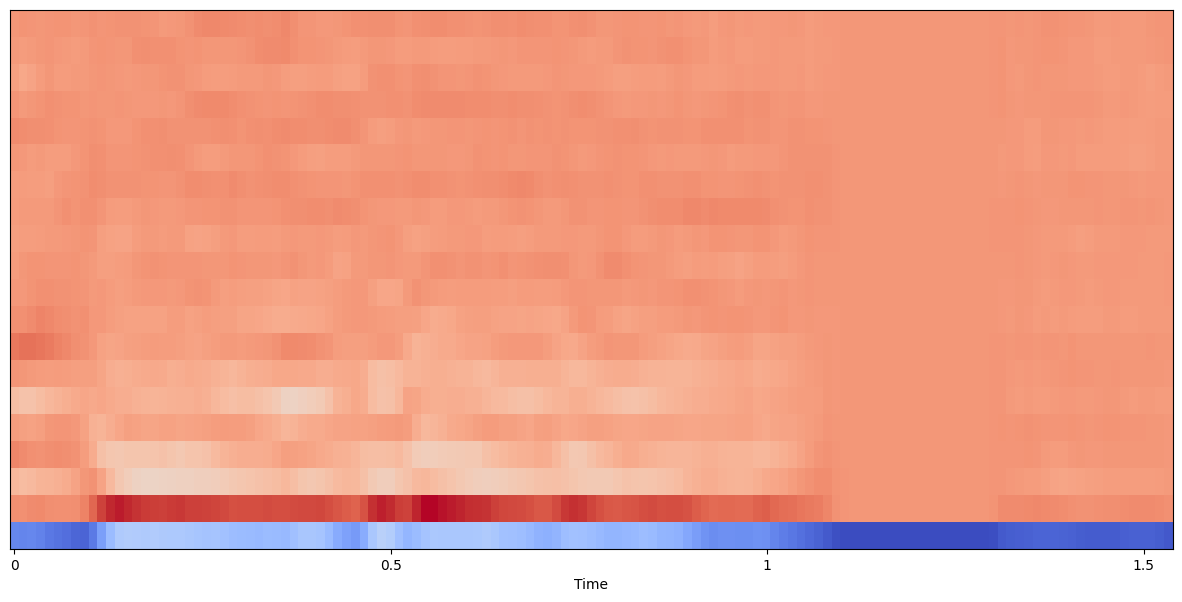

In [22]:
mfccs = librosa.feature.mfcc(y=x, sr=44100)
print(mfccs.shape)
(20, 97)
# Отображение MFCC:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

#### Цветность

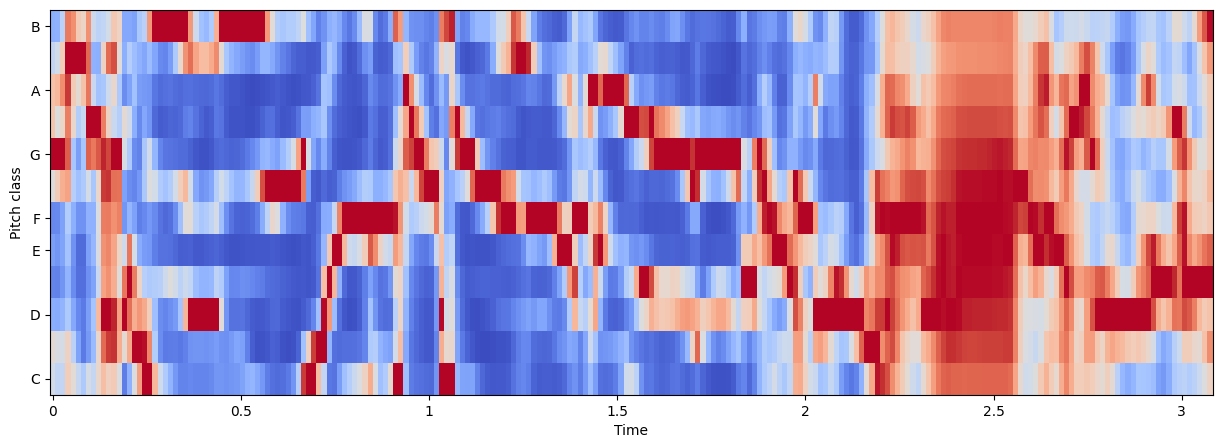

In [27]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=300)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=300, cmap='coolwarm')